### Notebook for plotting results for the manuscript

April 11, 2015

In [1]:
import pihm_methods as pm
reload(pm)
import pandas as pd
%pylab inline
plt.style.use('ggplot')

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.edgecolor'] = '#555555'
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.rcParams['text.usetex'] = False

Populating the interactive namespace from numpy and matplotlib


In [16]:
# Load in the results from scenario 1
sc1 = pd.read_pickle("../results/scenario1_analysis_results.pkl")

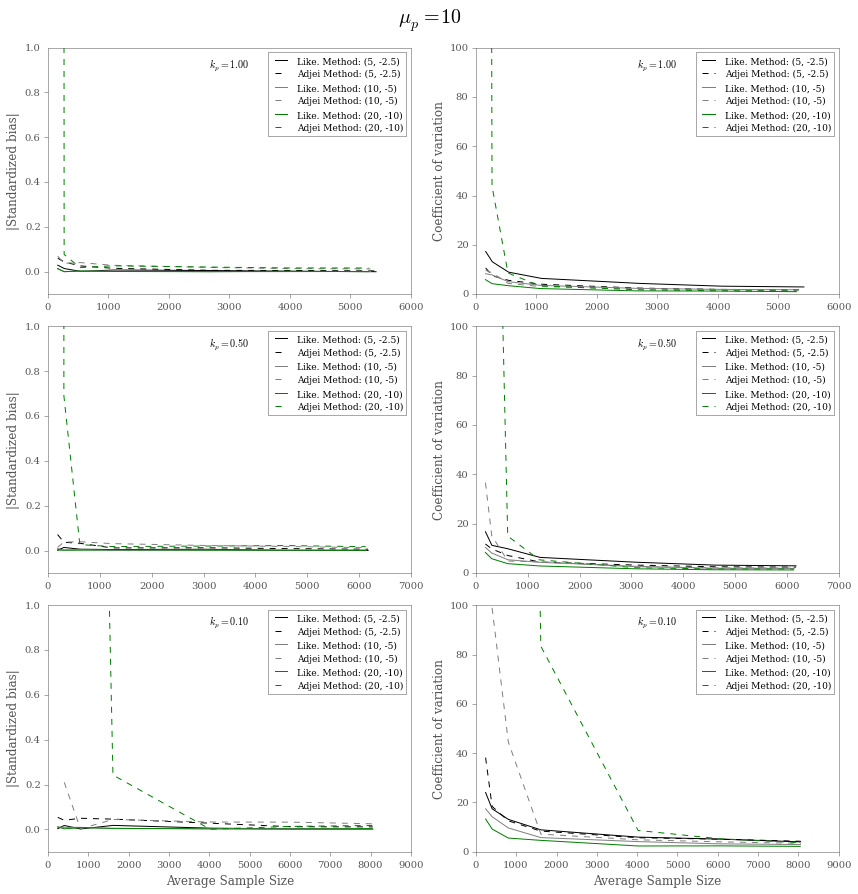

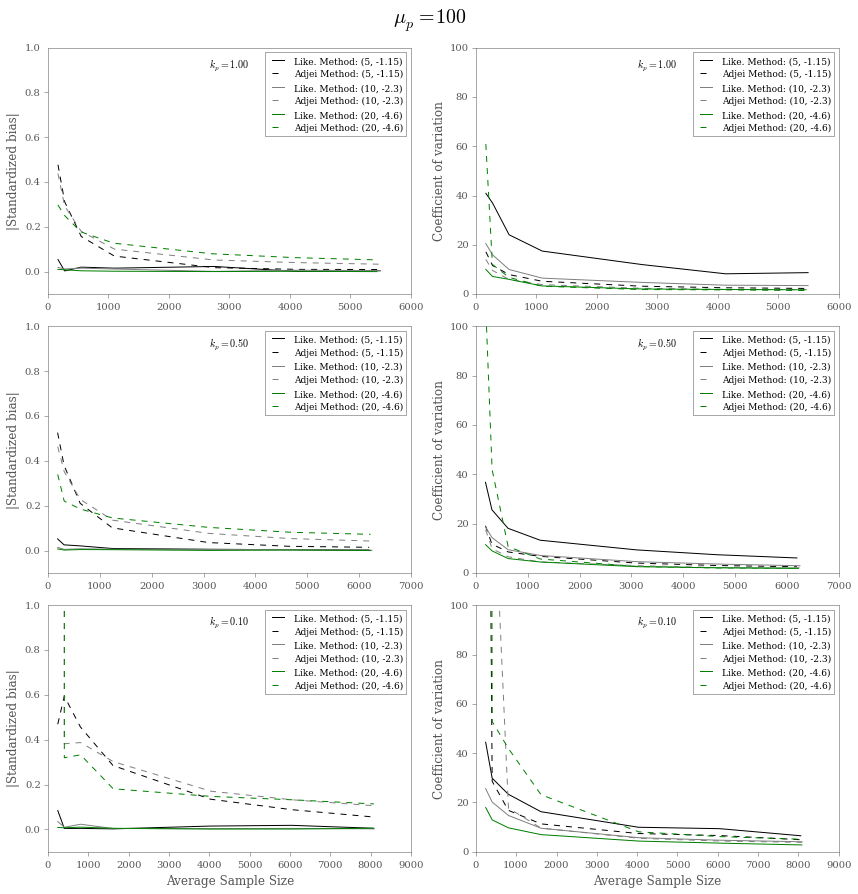

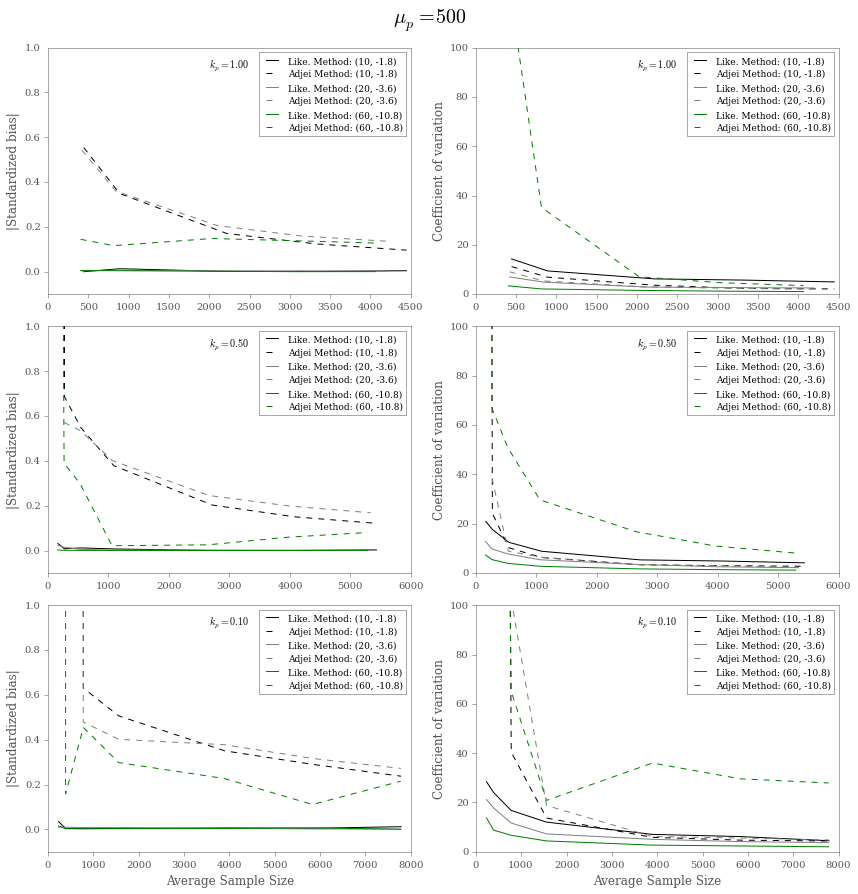

In [47]:
# Make 
param = "ld50"

mups = [10, 100, 500]
ld50_vec = [[(5, -2.5), (10, -5), (20, -10)], 
            [(5, -1.15), (10, -2.3), (20, -4.6)], 
            [(10, -1.8), (20, -3.6), (60, -10.8)]]
ks = [1, 0.5, .1]
colors = ["black", "grey", "green"]


for l, mup in enumerate(mups):
    
    fig, axes = plt.subplots(3, 2, figsize=(12, 12))

    for ax in np.ravel(axes):
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_left()

    bias_ax = axes[:, 0]
    prec_ax = axes[:, 1]
    ld50s = ld50_vec[l]
    
    for i, k in enumerate(ks):

        bias_ax[i].text(0.5, 0.92, r"$k_p = %.2f$" % k, horizontalalignment='center', 
                                    transform = bias_ax[i].transAxes)

        prec_ax[i].text(0.5, 0.92, r"$k_p = %.2f$" % k, horizontalalignment='center', 
                                    transform = prec_ax[i].transAxes)
        for j, ld50 in enumerate(ld50s):

            try:
                samp_adj, bias_adj, prec_adj = pm.extract_simulation_results(sc1, [mup, ld50, k], "adjei", param) 
            except:
                print([mup, ld50, k])

            try:
                samp_like, bias_like, prec_like = pm.extract_simulation_results(sc1, [mup, ld50, k], "likelihood", param)
            except:
                print([mup, ld50, k])

            like_res = pd.DataFrame(zip(samp_like, bias_like, prec_like), columns=["N", "b", "p"])
            like_res.sort("N", inplace=True)

            adj_res = pd.DataFrame(zip(samp_adj, bias_adj, prec_adj), columns=["N", "b", "p"])
            adj_res.sort("N", inplace=True)

            like_label = "Like. Method: " + str(ld50)
            adjei_label = "Adjei Method: " + str(ld50)
            bias_ax[i].plot(like_res.N, like_res.b, color=colors[j], label=like_label)
            bias_ax[i].plot(adj_res.N, adj_res.b, '--', color=colors[j], label=adjei_label)
            bias_ax[i].set_ylim(-0.1, 1)

            prec_ax[i].plot(like_res.N, like_res.p, color=colors[j], label=like_label)
            prec_ax[i].plot(adj_res.N, adj_res.p, '--', color=colors[j], label=adjei_label)
            prec_ax[i].set_ylim(0, 100)

            # Set xlabels
            if prec_ax[i].is_last_row():
                prec_ax[i].set_xlabel("Average Sample Size")

            if bias_ax[i].is_last_row():
                bias_ax[i].set_xlabel("Average Sample Size")

            # Set ylabels
            prec_ax[i].set_ylabel("Coefficient of variation")
            bias_ax[i].set_ylabel("|Standardized bias|")

        bias_ax[i].legend(prop={"size" : 9})
        prec_ax[i].legend(prop={"size" : 9})


    fig.suptitle(r"$\mu_p = %i$" % (mup), y=1.03, size=20)
    plt.tight_layout()
    fig.savefig("../results/bais_prec_figure_for_ld50_mu%i.pdf" % (mup), dpi=300)

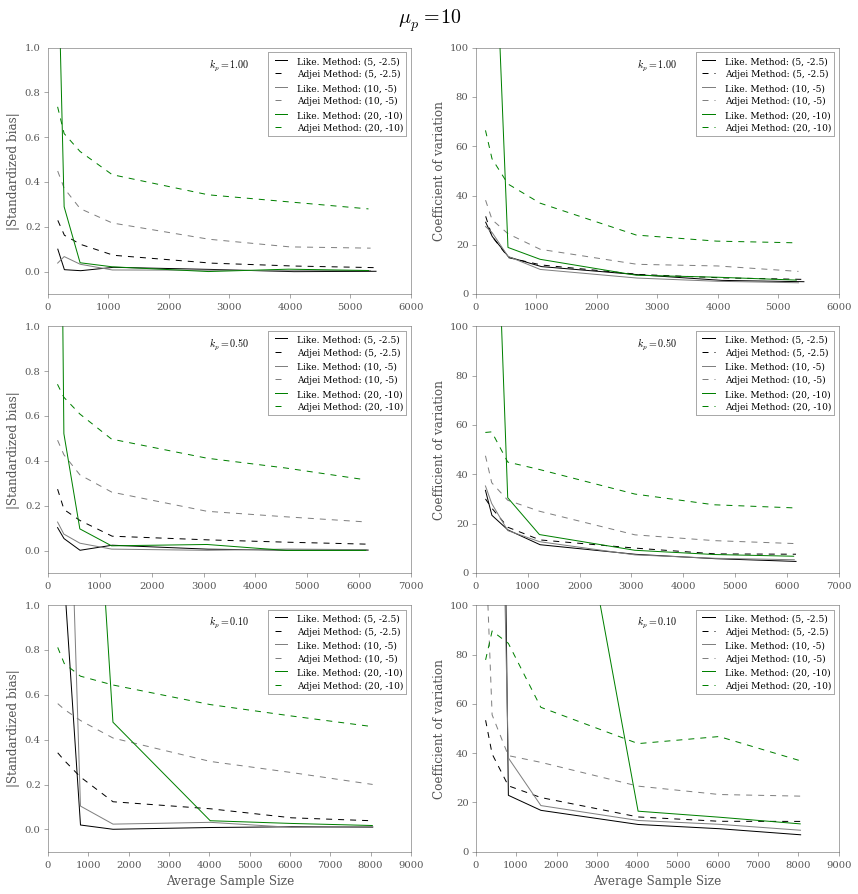

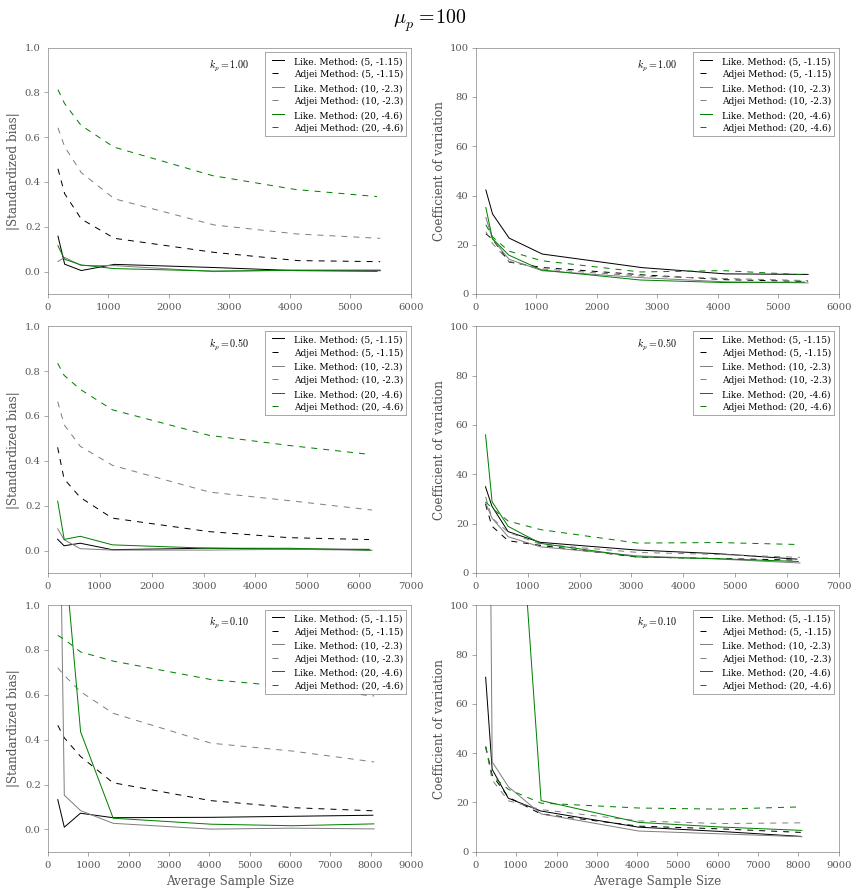

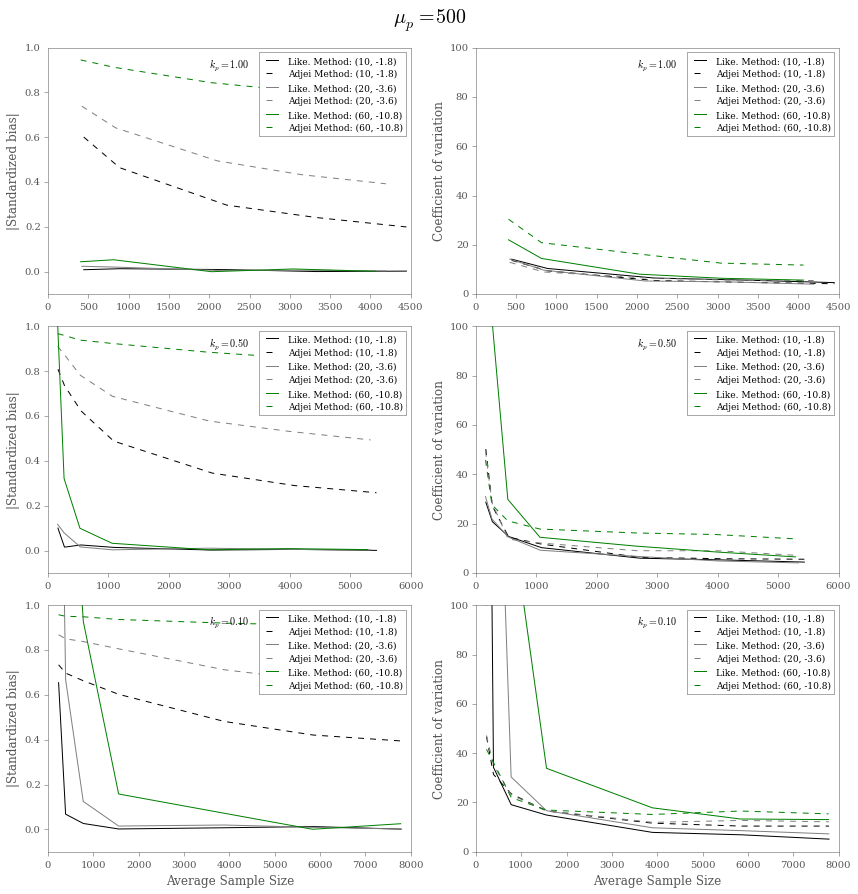

In [48]:
# Make 
param = "a"

mups = [10, 100, 500]
ld50_vec = [[(5, -2.5), (10, -5), (20, -10)], 
            [(5, -1.15), (10, -2.3), (20, -4.6)], 
            [(10, -1.8), (20, -3.6), (60, -10.8)]]
ks = [1, 0.5, .1]
colors = ["black", "grey", "green"]


for l, mup in enumerate(mups):
    
    fig, axes = plt.subplots(3, 2, figsize=(12, 12))

    for ax in np.ravel(axes):
        ax.xaxis.tick_bottom()
        ax.yaxis.tick_left()

    bias_ax = axes[:, 0]
    prec_ax = axes[:, 1]
    ld50s = ld50_vec[l]
    
    for i, k in enumerate(ks):

        bias_ax[i].text(0.5, 0.92, r"$k_p = %.2f$" % k, horizontalalignment='center', 
                                    transform = bias_ax[i].transAxes)

        prec_ax[i].text(0.5, 0.92, r"$k_p = %.2f$" % k, horizontalalignment='center', 
                                    transform = prec_ax[i].transAxes)
        for j, ld50 in enumerate(ld50s):

            try:
                samp_adj, bias_adj, prec_adj = pm.extract_simulation_results(sc1, [mup, ld50, k], "adjei", param) 
            except:
                print([mup, ld50, k])

            try:
                samp_like, bias_like, prec_like = pm.extract_simulation_results(sc1, [mup, ld50, k], "likelihood", param)
            except:
                print([mup, ld50, k])

            like_res = pd.DataFrame(zip(samp_like, bias_like, prec_like), columns=["N", "b", "p"])
            like_res.sort("N", inplace=True)

            adj_res = pd.DataFrame(zip(samp_adj, bias_adj, prec_adj), columns=["N", "b", "p"])
            adj_res.sort("N", inplace=True)

            like_label = "Like. Method: " + str(ld50)
            adjei_label = "Adjei Method: " + str(ld50)
            bias_ax[i].plot(like_res.N, like_res.b, color=colors[j], label=like_label)
            bias_ax[i].plot(adj_res.N, adj_res.b, '--', color=colors[j], label=adjei_label)
            bias_ax[i].set_ylim(-0.1, 1)

            prec_ax[i].plot(like_res.N, like_res.p, color=colors[j], label=like_label)
            prec_ax[i].plot(adj_res.N, adj_res.p, '--', color=colors[j], label=adjei_label)
            prec_ax[i].set_ylim(0, 100)

            # Set xlabels
            if prec_ax[i].is_last_row():
                prec_ax[i].set_xlabel("Average Sample Size")

            if bias_ax[i].is_last_row():
                bias_ax[i].set_xlabel("Average Sample Size")

            # Set ylabels
            prec_ax[i].set_ylabel("Coefficient of variation")
            bias_ax[i].set_ylabel("|Standardized bias|")

        bias_ax[i].legend(prop={"size" : 9})
        prec_ax[i].legend(prop={"size" : 9})


    fig.suptitle(r"$\mu_p = %i$" % (mup), y=1.03, size=20)
    plt.tight_layout()
    fig.savefig("../results/bais_prec_figure_for_a_mu%i.pdf" % (mup), dpi=300)

In [81]:
samp, bias, prec = pm.extract_simulation_results(sc1, [10, (20, -10), .1], "adjei", "ld50")
samp1, bias1, prec1 = pm.extract_simulation_results(sc1, [10, (20, -10), .1], "likelihood", "ld50")

In [38]:
fig.suptitle?

In [142]:
sum(np.array(ps) < 0.05)

65

In [23]:
pihm = pm.PIHM()

In [35]:
pihm.set_all_params(5000, 10, 1, 20, -10)

In [52]:
pihm.set_all_params(5000, 10, 1, 20, -10)
pihm.data = pihm.get_pihm_samples()[0]
print(pihm.likelihood_method(full_fit=False))
print(pihm.adjei_method([], [], no_bins=True, run_crof=False))

Optimization terminated successfully.
         Current function value: 5740.097505
         Iterations: 52
         Function evaluations: 99
(10, 1, 20.586229173384861, -10.328161899027679)
(5000, 10, 1, 10.954189702908637, -5.5866069937641107)
